# Experiments with KMeans on subsets of data

In [1]:
import os
import sys
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pose_parser.learning import model_builder as mb
from scipy.stats import randint

# Reloader
import importlib


# Dataset 1 - 25 frame window from end of labeled training example

## Try various column filtering strategies

Training Balance for weight_transfer_type:
1    417
0     59
Name: weight_transfer_type, dtype: int64


4476.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4476.61s - pydevd: Sending message related to proc

Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8333
Precision: 0.8684
Recall: 0.9519
F1 Score: 0.9083
ROC AUC: 0.6544

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.06      0.09        16
           1       0.87      0.95      0.91       104

    accuracy                           0.83       120
   macro avg       0.52      0.51      0.50       120
weighted avg       0.77      0.83      0.80       120



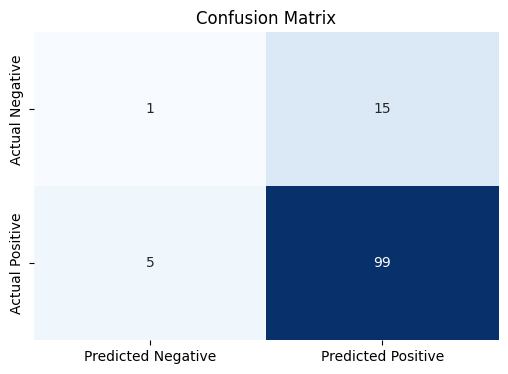

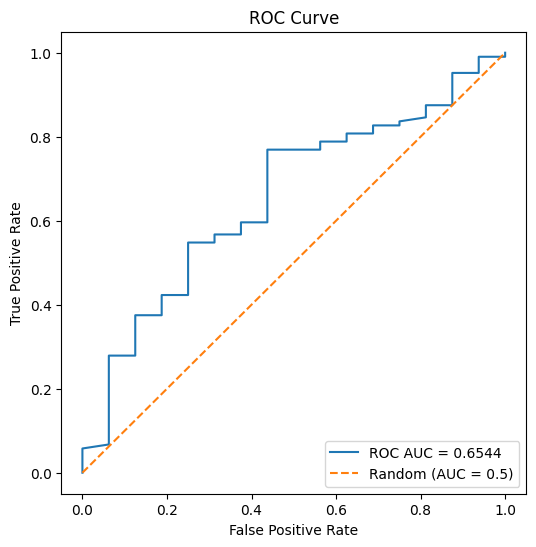

In [49]:
importlib.reload(mb)
model_builder = mb.ModelBuilder()

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}

data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
target = 'weight_transfer_type'


X = pd.read_csv(data_file, index_col=0)

# Rewrite values based on map
for key in value_map.keys():
    X[key] = X[key].map(value_map[key])
X.dropna(thresh=X.shape[1], inplace=True)
y = X[target]

# filters...
frame_limit = 25
x = 3
filters = {
    "OR" : [f"frame-{i}" for i in range(frame_limit) if i % x == 0],
    "AND": ["distance", "2d_", "heel"],
    "WHITELIST": ["weight_transfer_type"],
    "BLACKLIST": ["video_id"]
    
}      

filtered = [col for col in X.columns if model_builder.validate_string(col, filters)]
X = X[filtered]


model_builder.X = X
model_builder.y = y
model_builder.target =target

model_builder.set_train_test_split(
    balance_off_target=False,
    upsample_minority=False,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()


## Try K-means on successful weight transfers to see if we have different versions of success

## K-means on successful weight transfer

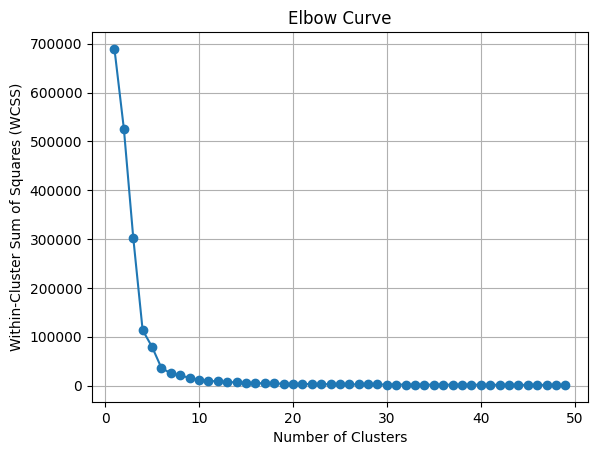

Optimal Number of Clusters: 6
Optimal K-means Scores:
K Means Evaluation
Silhouette Score: 0.5450874019588319

Between Clusters Sum of Squares (BCSS): 651758.2646892371

Sum of Squares Error (SSE): 36147.777193468704

Maximum Radius: 44.655163518063624

Average Radius: 6.745509188236895


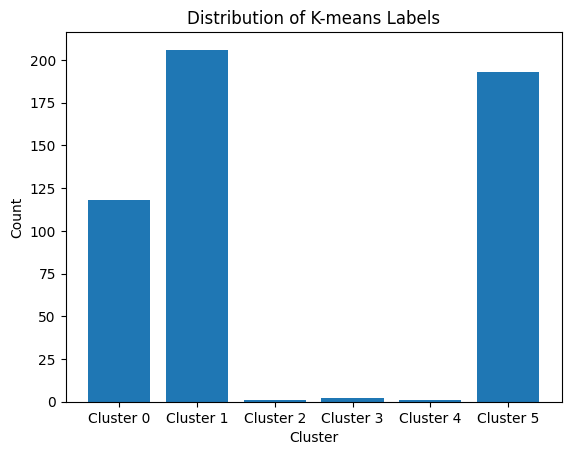

In [48]:
importlib.reload(mb)
model_builder = mb.ModelBuilder()

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}

data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
target = 'weight_transfer_type'


X = pd.read_csv(data_file, index_col=0)

# Rewrite values based on map
for key in value_map.keys():
    X[key] = X[key].map(value_map[key])
X.dropna(thresh=X.shape[1], inplace=True)
y = X[target]

# filters...
# row filters
X = X[X["weight_transfer_type"] == 1]

# column filters
frame_limit = 25
x = 2
filters = {
    "OR" : [f"frame-{i}" for i in range(frame_limit) if i % x == 0],
    "AND": ["distances", "2d_", "heel"],
    "WHITELIST": [],
    "BLACKLIST": ["weight_transfer_type", "video_id", "step_type"]
}      

filtered = [col for col in X.columns if model_builder.validate_string(col, filters)]
X = X[filtered]


model_builder.X = X
model_builder.y = y


model_builder.find_k_means_clusters(cluster_range=(1, 50))



## K-means on failure weight transfer

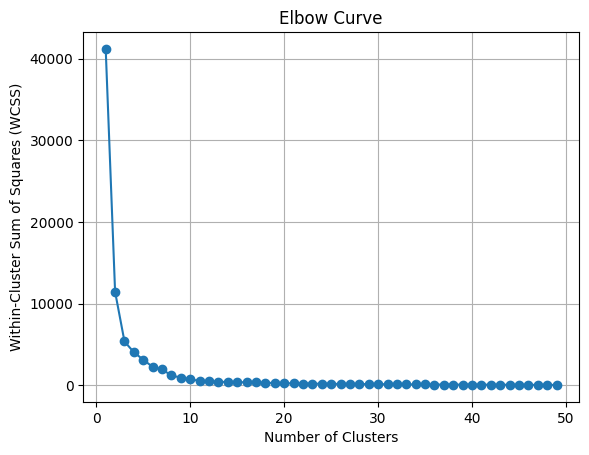

Optimal Number of Clusters: 6
Optimal K-means Scores:
K Means Evaluation
Silhouette Score: 0.46079766341276335

Between Clusters Sum of Squares (BCSS): 38543.40168147944

Sum of Squares Error (SSE): 2085.724731851229

Maximum Radius: 15.428408565836849

Average Radius: 4.5297455956532815


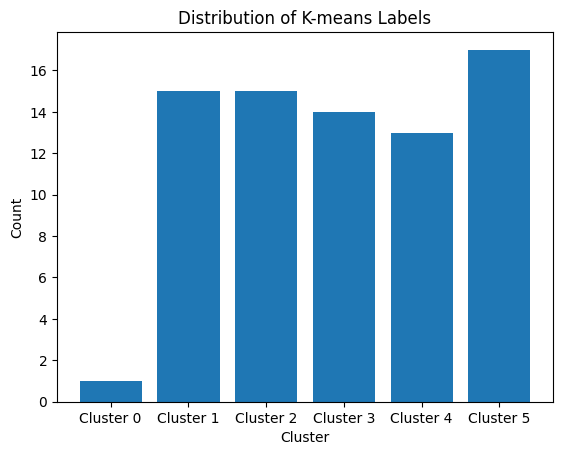

In [47]:
importlib.reload(mb)
model_builder = mb.ModelBuilder()

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}

data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
target = 'weight_transfer_type'


X = pd.read_csv(data_file, index_col=0)

# Rewrite values based on map
for key in value_map.keys():
    X[key] = X[key].map(value_map[key])
X.dropna(thresh=X.shape[1], inplace=True)
y = X[target]

# filters...
# row filters
X = X[X["weight_transfer_type"] == 0]

# column filters
frame_limit = 25
x = 2
filters = {
    "OR" : [f"frame-{i}" for i in range(frame_limit) if i % x == 0],
    "AND": ["distances", "2d_", "heel"],
    "WHITELIST": [],
    "BLACKLIST": ["video_id", "step_type"]
}      

filtered = [col for col in X.columns if model_builder.validate_string(col, filters)]
X_filtered = X[filtered]


model_builder.X = X
model_builder.y = y


kmeans = model_builder.find_k_means_clusters(cluster_range=(1, 50))


## Test Success versus Failure K-means and train classifier on strongest clusters

Success Cases


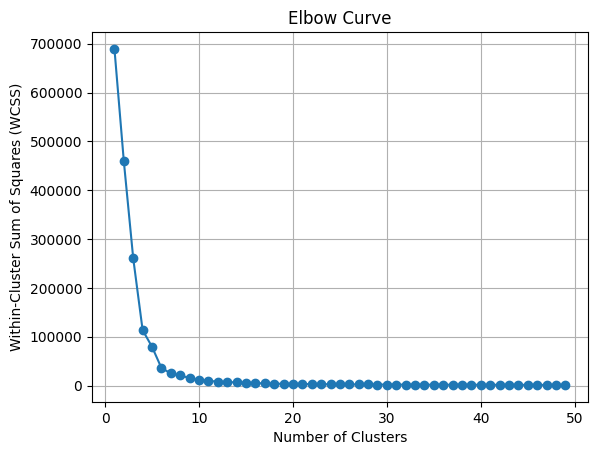

Optimal Number of Clusters: 6
Optimal K-means Scores:
K Means Evaluation
Silhouette Score: 0.5450824752625127

Between Clusters Sum of Squares (BCSS): 651759.1731989348

Sum of Squares Error (SSE): 36146.86868377114

Maximum Radius: 44.655163518063624

Average Radius: 6.745409294279151


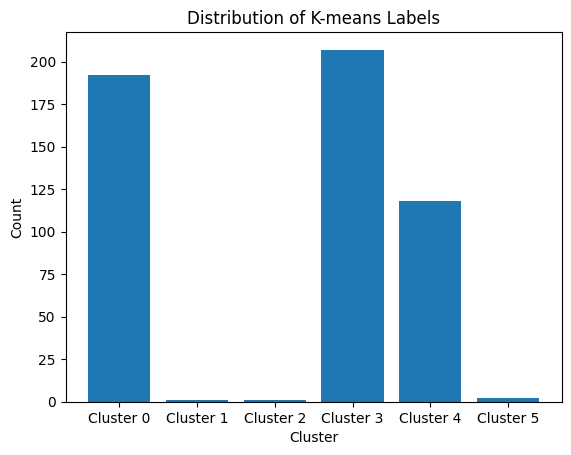

Failure Cases


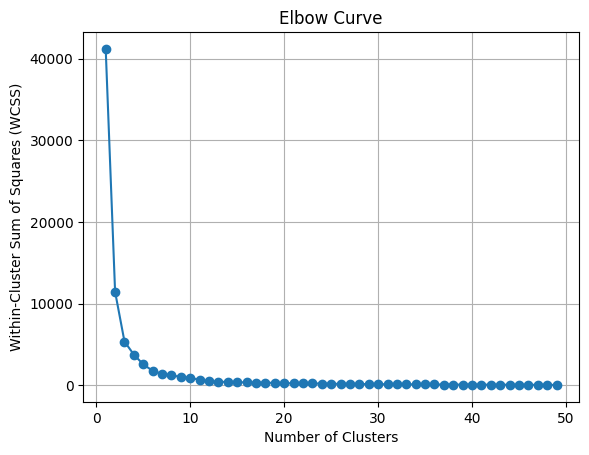

Optimal Number of Clusters: 5
Optimal K-means Scores:
K Means Evaluation
Silhouette Score: 0.5445389411056236

Between Clusters Sum of Squares (BCSS): 38072.254104445834

Sum of Squares Error (SSE): 2556.872308884833

Maximum Radius: 16.07813530086952

Average Radius: 4.990037121997102


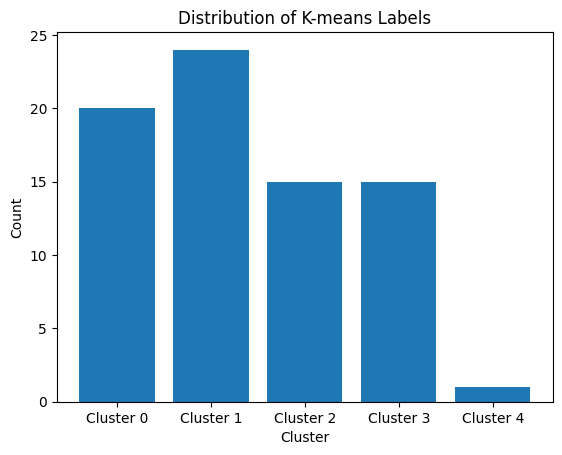

In [75]:
importlib.reload(mb)
model_builder = mb.ModelBuilder()

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}

data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
target = 'weight_transfer_type'


X = pd.read_csv(data_file, index_col=0)

# Rewrite values based on map
for key in value_map.keys():
    X[key] = X[key].map(value_map[key])
X.dropna(thresh=X.shape[1], inplace=True)
y = X[target]

# filters...
# row filters
X_failure = X[X["weight_transfer_type"] == 0]
X_success = X[X["weight_transfer_type"] == 1]

# column filters
frame_limit = 25
x = 2
filters = {
    "OR" : [f"frame-{i}" for i in range(frame_limit) if i % x == 0],
    "AND": ["distances", "2d_", "heel"],
    "WHITELIST": ["weight_transfer_type"],
    "BLACKLIST": ["video_id"]
}      

filtered = [col for col in X.columns if model_builder.validate_string(col, filters)]
X_failure_filtered = X_failure[filtered]
X_success_filtered = X_success[filtered]


print("Success Cases")
kmeans_success = model_builder.find_k_means_clusters(X=X_success_filtered, cluster_range=(1, 50), random_state=123)
print("Failure Cases")
kmeans_failure = model_builder.find_k_means_clusters(X=X_failure_filtered, cluster_range=(1, 50), random_state=123)


### Above, trained k-means on all the failure examples and again on all the success examples. Below, choosing from specific clusters, recombining the data, and training a gradient boost.

Training Balance for weight_transfer_type:
1    165
0     35
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.9020
Precision: 0.9111
Recall: 0.9762
F1 Score: 0.9425
ROC AUC: 0.8188
Matthews correlation coefficient: 0.629170389631229

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.91      0.98      0.94        42

    accuracy                           0.90        51
   macro avg       0.87      0.77      0.80        51
weighted avg       0.90      0.90      0.89        51



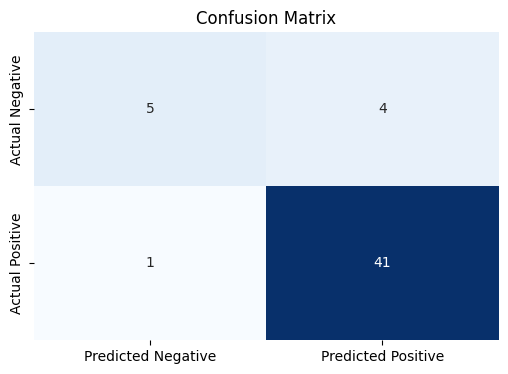

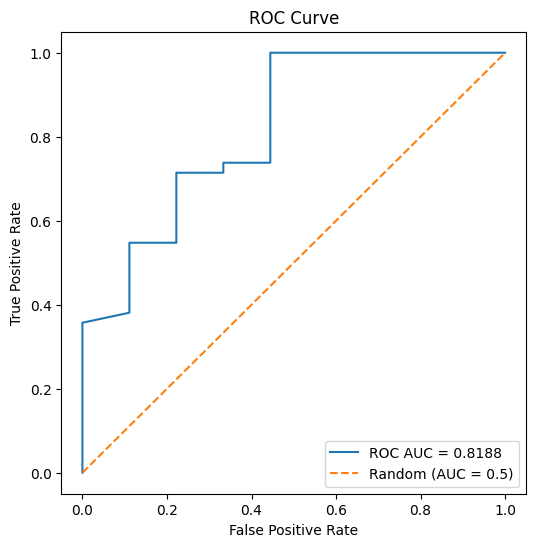

In [77]:
X_success_subsets = model_builder.get_cluster_subset(
    X=X_success_filtered, 
    kmeans=kmeans_success, 
    cluster_list=[3]
)
X_failure_subsets = model_builder.get_cluster_subset(
    X=X_failure_filtered, 
    kmeans=kmeans_failure, 
    cluster_list=[0, 1]
)
# shuffle the newly combined datasets
X_combined = pd.concat([X_failure_subsets, X_success_subsets], axis=0, ignore_index=True)
X_combined = X_combined.sample(frac=1, random_state=42).reset_index(drop=True)

y_combined = X_combined[target]

model_builder.X = X_combined
model_builder.y = y_combined
model_builder.target =target

model_builder.set_train_test_split(
    balance_off_target=False,
    upsample_minority=False,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()